## **Tema 2 - P2. Enunciado**
------------------------------------------------------------------------------
***

Un pilote de madera, enterrado en la tierra, soporta una carga P enteramente por fricción a lo largo de sus costados. Se supone que la fuerza de fricción $f$ por unidad de longitud de pilote está uniformemente distribuida en la superficie del pilote. El pilote tiene longitud $L$, área transversal $A$ y módulo de elasticidad $E$.

Se pide:
- a) Obtener una fórmula para el acortamiento $\Delta L$ del pilote en términos de $P$, $L$, $E$ y $A$.
- b) Dibujar un diagrama que muestre cómo varía la tensión de compresión $\sigma_c$ a lo largo del pilote. Realizar un diagrama de las fuerzas que actuan sobre el pilote.


**Resolución:**
------------------------------------------------------------------------------


**Inicialización**

Lo primero que debemos hacer es cargar las librerías necesarias de Python. Para este problema, en particular, será de gran utilidad la librería *sympy* que permite realizar cálculo simbólico (como haríamos con Máxima, Maple o Mathemática). También la librería *matplotlib* nos será de utilidad para hacer la gráfica.

In [1]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

Y después definiremos las variables simbólicas necesarias (aquellas que son datos del problema, con las que tendremos que trabajar y que no se les ha asignado ningún valor, por lo que todavía son "símbolos").

In [2]:
P,L,A,E,f,x,N=symbols('P L A E f x N') #variables simbólicas

**Cálculo del esfuerzo de fricción $f$**

El primer paso es expresar $f$ en función de $P$ y $L$ utilizando las ecuaciones de equilibrio estático (global).

In [3]:
#-------------------------------------#
#          Equilibrio global
#-------------------------------------#
#Se utiliza la funcion "linsolve" que resuelve ecuaciones y sistemas de ecuaciones.
#Añadimos la ecuación ΣFx=0 ->  P - ∫fdx = 0  (los límites de la integral irán entre 0 y L)
#Nota: Para escribir en lenguaje Python esa integral, usamos la función integrate(f, (x, 0, L))
sol,=linsolve([ 
                P-integrate(f, (x, 0, L)) 
             ], 
                (f)  #Es la lista de incógnitas a resolver
            ) 
f=sol[0] #asignamos la solución del sistema a la variable f

print("El esfuerzo de fricción por ud. de longitud es:")
print("f=", f)

El esfuerzo de fricción por ud. de longitud es:
f= P/L


**Cálculo del acortamiento del pilote**

Para calcular el acortamiento del pilote utilizaremos la fórmula:

$$\Delta L=\int_{0}^{L} \frac{N(x)}{EA}dx$$

por lo tanto lo primero de todo será obtener la expresión de $N(x)$ mediante el método de las secciones:


In [4]:
#-------------------------------------#
#          Equilibrio elástico
#-------------------------------------#
#Se utiliza la funcion "linsolve" que resuelve ecuaciones y sistemas de ecuaciones.
#Añadimos la ecuación ΣFx=0 ->  P - ∫fdx + N(x) = 0  (los límites de la integral irán entre 0 y x)
#Nota: Para escribir en lenguaje Python esa integral, usamos la función integrate(f, (x, 0, L))
sol,=linsolve([ 
                P-integrate(f, (x, 0, x)) + N
             ], 
                (N)  #Es la lista de incógnitas a resolver
            ) 
N=sol[0] #asignamos la solución del sistema a la variable f

print("El esfuerzo axial en x es N(x):")
print("N(x)=", N)

El esfuerzo axial en x es N(x):
N(x)= (-L*P + P*x)/L


Y una vez tenemos $N(x)$ ya podemos calcular la integral para obtener $\Delta L$:

In [5]:
DL=integrate(N/(E*A), (x, 0, L))

print("El acortamiento de la barra es:")
print("DeltaL=", DL)

El acortamiento de la barra es:
DeltaL= -L*P/(2*A*E)


**Cálculo de la expresión de la tensión de compresión**

Para calcular la tensión de compresión simplemente dividiremos $N(x)$ por el área:

$$\sigma(x)=\frac{N(x)}{A}$$

In [6]:
sigma=N/A

print("La tensión de compresión es:")
print("sigma(x)=", sigma)

La tensión de compresión es:
sigma(x)= (-L*P + P*x)/(A*L)


**Representación gráfica de $\sigma(x)$**

Para realizar la representación gráfica daremos valores a las variables. Se representará un diagrama de los esfuerzos que actuan sobre el pilote cuando aplicamos el método de las secciones y cortamos por $x_{cut}$. En el código, al punto de corte lo llamaremos ```cut```. Cambiando el valor de esta variable veremos gráficamente como se modifica el esfuerzo axial.

Los valores numéricos de las reacciones considerando P= 1000.0 N, A= 0.5  m^2, L= 10.0  m son:
sigma= 200.0*x - 2000.0  N


[(-2.0, 12.0)]

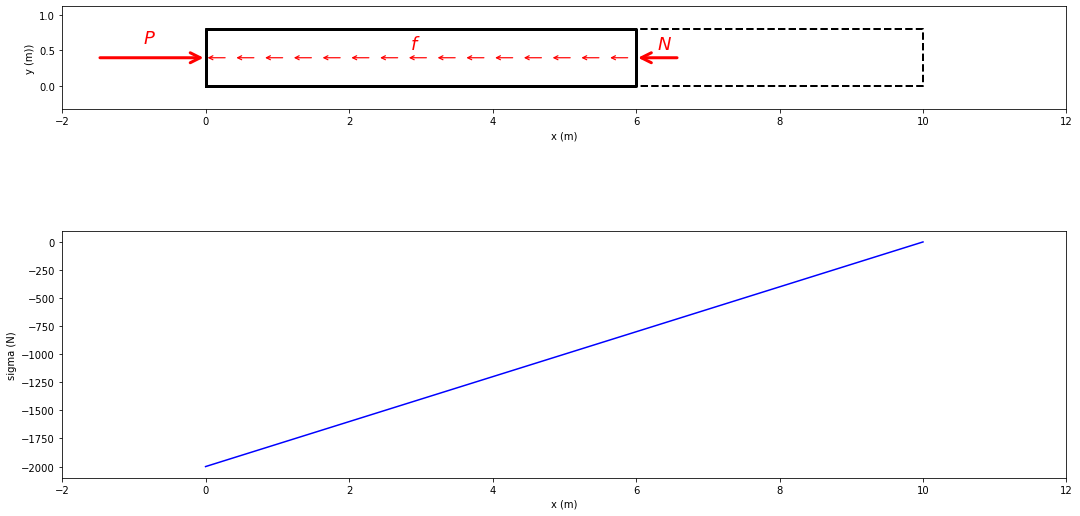

In [8]:
Pval=1000.0 #N
Aval=0.5 #m^2
Lval=10.0 #m^2

cut=6.0 #m

#Sustituimos los valores numéricos en la expresión de sigma y N y las llamamos de otra manera para conservar la original
sg=sigma.subs([(P,Pval),(A,Aval),(L,Lval)])
ng=N.subs([(P,Pval),(A,Aval),(L,Lval)])

print("Los valores numéricos de las reacciones considerando P=",Pval,"N, A=",Aval," m^2, L=",Lval, " m son:")
print("sigma=", sg, " N")



# Representación gráfica
Xmin= 0 ; Xmax=Lval; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)",
xx=np.zeros((nopto,))
ss=np.zeros((nopto,))
nn=np.zeros((nopto,))

for i in range(0,nopto): 
    xx[i] = Xmin+i*(Xmax-Xmin)/(nopto-1) 
    ss[i] = sg.subs([(x,xx[i])])
    nn[i] = ng.subs([(x,xx[i])])
    
filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(2,1,figsize=(18, 10))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

d=2*sqrt(Aval/math.pi)   
nmag=ng.subs([(x,cut)]) #magnitud de sigma en la sección de corte
maxval=max(abs(i) for i in nn)
ratio=abs(nmag)/maxval

ax.plot((0,Lval,Lval,0,0),(0,0,d,d,0), color='black',linewidth=2,linestyle='--')
ax.plot((0,cut,cut,0,0),(0,0,d,d,0), color='black',linewidth=3)
ax.annotate("", (0, d/2), (-Lval*0.15, d/2) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
ax.annotate("", (cut, d/2), (cut+Lval*0.15*ratio, d/2) , arrowprops={'arrowstyle':'->','mutation_scale':25, 'lw': 3.0, 'color': 'r'})
for i in range(0,int(nopto*cut/Lval),20):   
    ax.annotate("", (xx[i], d/2), (xx[i+15], d/2),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})
ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("y (m))") # Nombre y unidades del eje y
ax.set_aspect('equal', adjustable='box')
ax.set(xlim=(-float(Lval)*0.2, float(Lval)*1.2), ylim=(-float(d)*0.4, float(d)*1.4)) #Se imponen los límites de los ejes

ax.text(-Lval*0.07, 0.75*d, "$P$", size=18, color='r', va="baseline", ha="right", multialignment="left")
ax.text(cut/2, 0.66*d, "$f$", size=18, color='r', va="baseline", ha="right", multialignment="left")
if cut<10.0:
    ax.text(cut+Lval*0.05, 0.66*d, "$N$", size=18, color='r', va="baseline", ha="right", multialignment="left")


    
    
    
ax2.plot(xx,ss, color="blue")
ax2.set_xlabel("x (m)") # Nombre y unidades del eje x
ax2.set_ylabel("sigma (N)") # Nombre y unidades del eje y
ax2.set(xlim=(-float(Lval)*0.2, float(Lval)*1.2)) #Se imponen los límites de los ejes
